**Цель исследования:** найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Задача:** выполнить предобработку данных и изучить их.

**Ход исследования:**
1. Обзор данных.
2. Предобработка данных.
3. Добавление в таблицу новых столбцов с параметрами, которые помогут в исследовательском анализе.
4. Исследовательский анализ данных.

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('.\\data\\real_estate_data.csv' , sep = '\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
len(data)

23699

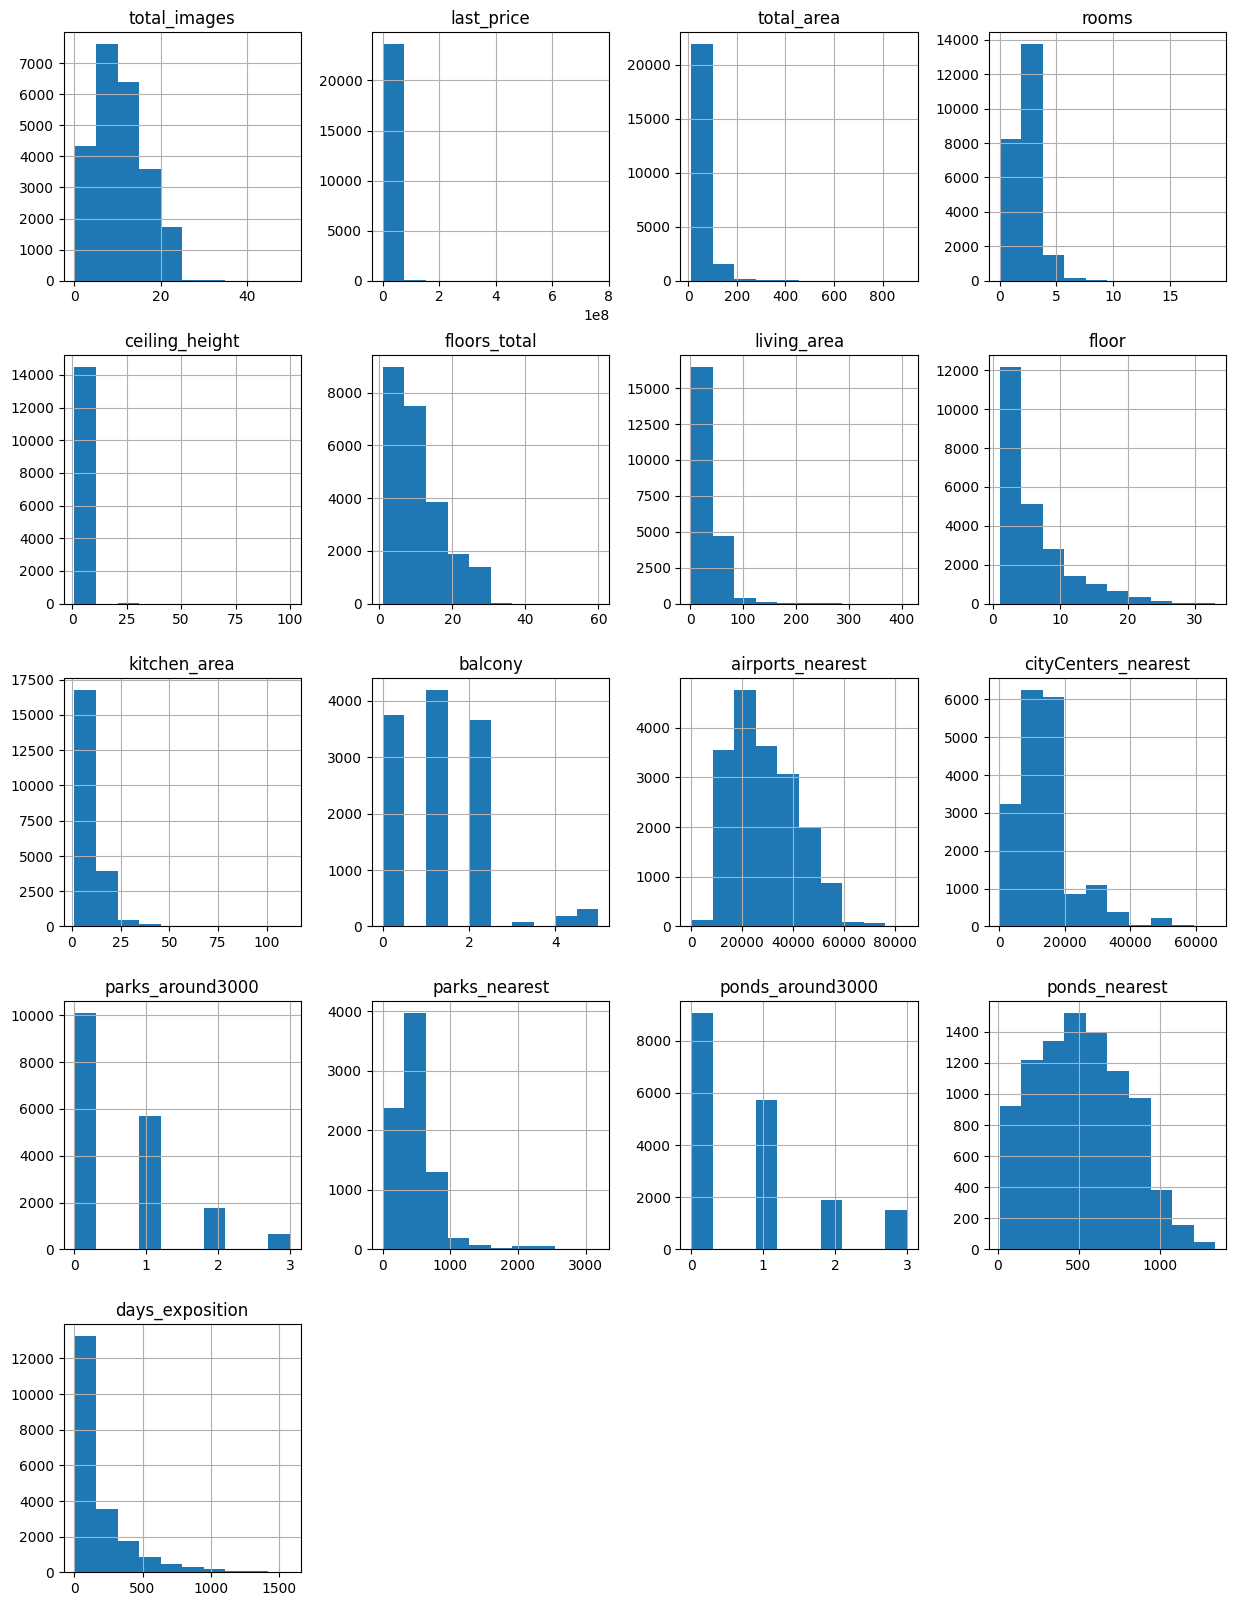

In [4]:
data.hist(figsize = (15,20));

**2. Предобработка данных**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Прежде чем заменить тип данных, поработаем с пропусками

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Обработаем пропуски в процентах.

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [8]:
# Заменим NaN у балконов, видимо, в этих квартирах действительно нет балкона.
data['balcony'] = data['balcony'].fillna(0) 

In [9]:
# Так как наличие апартаментов - булевое значение, то заменил пропуски на 0
data['is_apartment'] = data['is_apartment'].fillna(0)

In [10]:
data = data.astype({'balcony': 'Int64', 
                    'floors_total': 'Int64', 
                    'parks_around3000': 'Int64', 
                    'ponds_around3000': 'Int64',
                    'locality_name' : 'str', 
                    'is_apartment': 'bool',
                    })

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  Int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  Int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [12]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
duplicates_1 = ['поселок', 'поселок городского типа', 'городской поселок']
data.replace(regex = duplicates_1, value = 'посёлок', inplace = True)
duplicates_2 = ['деревня Кудрово']
data.replace(regex = duplicates_2, value = 'Кудрово', inplace = True)

Поработаем с аномалиями.

In [14]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Потолок не может быть 14 или 27,5 метров, а уж тем более 100. Видимо, не там поставили запятую. Заменим некоторые значения, которые показались опечаткой.

In [15]:
data.loc[data['ceiling_height']>14 , 'ceiling_height']= data['ceiling_height']/10

Но все равно остаются потолки с высотой 6м и даже 100м.

In [16]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

Распределение говорит нам о том, что нормой считаются потолки до 3м. Будем считать, что потолки выше 4м - аномалия. Посмотрим на расхождение высот потолков выше 4м. И оценим, как они распределены в 1 и 3 квартилях

In [17]:
data_ceiling_height = data[data['ceiling_height']>4]
data_ceiling_height['ceiling_height'].describe()

count    53.000000
mean      5.200000
std       1.911779
min       4.060000
25%       4.200000
50%       4.500000
75%       5.200000
max      14.000000
Name: ceiling_height, dtype: float64

значения в 1 и 3 квартилях очень близки: 4.2 и 5.85 соотвественно. А максимальное значение 100. Значит Есть выбросы. Была допущена ошибка. Можно заменить выбросы на слишком выбивающиеся значения.

Посмотрим аномалии общей площади 

In [18]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Из интернет-источника узнаем, что средняя общая площадь квартиры составляет не более 80 кв.м. Числовое описание заставляет задуматься о выбросах. Удалять строки - опасно. Разберемся в чем же дело. Может, на площадь влияет количетсво комнат?

In [19]:
# балконы
len(data[(data['balcony']>2)& (data['rooms']==1)])

43

Предположим, что в квартире в каждой комнате есть балкон + всегда еще есть балкон на кухне. Сколько таких квартир?

In [20]:
data[data['balcony']> data['rooms']+1 ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.00,2016-05-04T00:00:00,3,NaN,14,59.0,8,False,...,12.0,5,Санкт-Петербург,37715.0,12612.0,1,725.0,1,759.0,179.0
116,18,10999000.0,97.20,2017-11-13T00:00:00,3,2.50,16,NaN,16,False,...,18.3,5,Санкт-Петербург,19426.0,21138.0,0,NaN,2,390.0,394.0
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24,15.5,2,False,...,NaN,2,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,181.0
250,13,3200000.0,51.70,2019-01-22T00:00:00,2,2.65,16,29.2,5,False,...,7.7,4,Всеволожск,NaN,NaN,<NA>,NaN,<NA>,NaN,21.0
263,12,39900000.0,140.60,2016-11-19T00:00:00,2,3.50,8,39.8,7,False,...,49.2,4,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23497,17,6150000.0,55.40,2019-04-22T00:00:00,2,2.80,20,29.4,16,False,...,9.6,4,Санкт-Петербург,16285.0,13873.0,0,NaN,1,481.0,NaN
23526,14,5800000.0,60.69,2018-03-13T00:00:00,3,2.50,9,39.7,2,False,...,6.2,5,Санкт-Петербург,51239.0,15954.0,0,NaN,0,NaN,30.0
23549,5,19600000.0,184.00,2016-04-21T00:00:00,3,3.00,19,55.7,19,False,...,24.5,5,Санкт-Петербург,18995.0,4837.0,0,NaN,0,NaN,205.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9,18.0,8,False,...,NaN,2,Никольское,NaN,NaN,<NA>,NaN,<NA>,NaN,82.0


438 квартир с данным условием. Это выбросы.

Я думаю, что с балконами напутали. Больше 2 балкона(считая лоджию) - аномалия

In [21]:
data['balcony'].describe()

count     23699.0
mean      0.59108
std      0.959298
min           0.0
25%           0.0
50%           0.0
75%           1.0
max           5.0
Name: balcony, dtype: Float64

Заменим дейсвительно странные значения пропусками. Остальные оставим. Вдруг, действительно в каждой комнате по одному балкону находится(в том числе и на кухне).

In [22]:
data.loc[data['balcony']> data['rooms'] + 1, 'balcony'] == 'NaN'

41       False
116      False
144      False
250      False
263      False
         ...  
23497    False
23526    False
23549    False
23592    False
23637    False
Name: balcony, Length: 438, dtype: boolean

Посмотрим на комнаты. Их бывало 0 штук. И где они находятся. И какова их площадь

In [23]:
data.loc[data['rooms']==0, 'locality_name'].unique()

array(['посёлок Мурино', 'Кудрово', 'Санкт-Петербург',
       'посёлок Парголово', 'посёлок Шушары', 'посёлок Новый Свет',
       'Никольское', 'посёлок станции Корнево',
       'посёлок городского типа имени Свердлова',
       'посёлок Петро-Славянка', 'Всеволожск', 'Сертолово', 'Тосно',
       'посёлок Бугры', 'посёлок городского типа Дубровка',
       'городской посёлок Большая Ижора', 'деревня Новое Девяткино',
       'городской посёлок Янино-1', 'Отрадное',
       'городской посёлок Новоселье', 'Мурино'], dtype=object)

In [24]:
data.loc[data['rooms']==0, 'total_area'].unique()

array([ 27.  ,  25.  ,  27.11,  34.4 ,  24.1 ,  17.  ,  26.1 ,  35.  ,
        23.  ,  29.  ,  32.  ,  26.  ,  31.  ,  22.  ,  30.  ,  23.98,
        27.55,  27.1 ,  28.4 ,  26.49,  28.9 ,  24.  ,  73.6 ,  21.4 ,
        29.3 ,  28.  ,  25.4 ,  20.  ,  19.5 ,  30.3 ,  27.81,  26.8 ,
        32.3 ,  42.63,  29.2 ,  27.3 ,  21.3 ,  19.  ,  18.8 ,  15.5 ,
        38.3 ,  16.  ,  23.4 ,  27.56,  24.8 ,  28.3 ,  23.7 ,  44.2 ,
        24.75,  20.5 ,  29.1 ,  26.7 ,  25.27,  27.32,  23.06,  23.5 ,
        32.4 ,  21.  ,  24.2 ,  18.  ,  24.9 ,  58.4 ,  28.2 ,  24.05,
        24.4 ,  25.2 ,  43.3 ,  27.4 ,  23.3 ,  32.2 ,  32.03,  25.7 ,
        42.1 ,  22.3 ,  28.01,  32.8 ,  26.23,  25.3 ,  28.05,  31.1 ,
        22.5 ,  25.9 ,  32.5 ,  23.8 , 371.  ,  24.6 ,  30.5 ,  25.41,
        98.4 ,  23.6 ,  22.2 ,  27.5 ,  28.16,  27.6 ,  71.  ,  28.5 ,
        24.5 ,  22.7 ,  34.  ,  30.1 ,  27.7 ,  26.05,  23.39])

Эти данные ни о чем не говорят, лишь подтверждают, что это выброс. Ошибка. Заменим на NaN

In [25]:
data.loc[data['rooms']==0, 'rooms'] == 'NaN'

144      False
349      False
440      False
508      False
608      False
         ...  
23210    False
23442    False
23554    False
23592    False
23637    False
Name: rooms, Length: 197, dtype: bool

**После замены** проанализируем зависит ли площадь квартиры от комнаты

Построим ящик с усами, чтобы визуализировать забытое

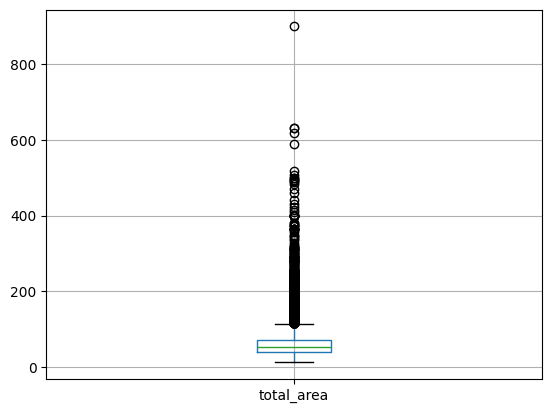

In [26]:
import matplotlib.pyplot as plt
data.boxplot(column='total_area');

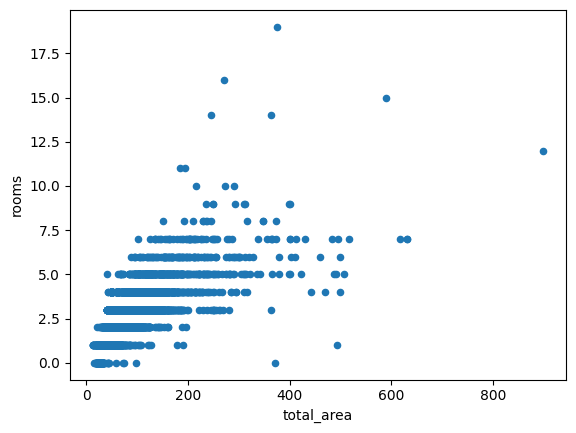

In [27]:
data.plot(x = 'total_area', y = 'rooms', kind='scatter' );

Видим, что площадь увеличивается с количетсвом комнат. Наблюдается положителя корреляция. Все супер

In [28]:
# явные дубликаты отсуствуют
data[data.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [29]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Явных дубликатов нет

*Вывод*: Убрали аномальные случаи, когда количество балконов превышает количество комнат(в том числе и кухню). Проанализировали площадь. Аномальных значений среди площади не выявлено, графики доказали, что площадь зависит от количества комнат. Поработали с явными и неявными дубликатами. Устранили их. **Ниже заменим пропуски в потолках и площадях, так как я хочу их заменить по километражу**

**3. Добавление в таблицу новых столбцы**

Цена одного квадратного метра

In [30]:
data['price_one_square_meter'] = data['last_price']/data['total_area']

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

Но сначала нужно сделать нужный формат даты

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= "%Y-%m-%dT%H:%M:%S")

In [32]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [33]:
data['month'] = data['first_day_exposition'].dt.month

In [34]:
data['year'] = data['first_day_exposition'].dt.year

[метод для визуализации даты](https://pythobyte.com/how-to-work-with-dates-and-times-in-python-0a176355/)


        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 

In [35]:
data['floors_total'].unique()

<IntegerArray>
[  16,   11,    5,   14,   12,   26,   24,   27,    9,    6,   17,   25,    3,
   23,   19,   18,    4,   22,    8,    2,   10,    7,   13,   15, <NA>,   20,
   28,   36,   21,   35,   34,   60,    1,   29,   33,   52,   37]
Length: 37, dtype: Int64

In [36]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=int64)

In [37]:
data['type_floor']= ''
data.loc[data['floor']== 1, 'type_floor']= 'первый'
data.loc[data['floor']== data['floors_total'], 'type_floor'] = 'последний'
data.loc[(data['floor'] != data['floors_total'])&(data['floor'] != 1), 'type_floor'] = 'другой'

In [38]:
# делаем расстояние в км
data['cityCenters_kilometers']=round(data['cityCenters_nearest']/1000)

In [39]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,type_floor,cityCenters_kilometers
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0


**Замена оставшихся пропусков по километражу**

In [40]:
data.pivot_table(index = 'cityCenters_kilometers', 
                 values = ['ceiling_height', 'living_area', 'kitchen_area'], 
                 aggfunc = 'median')

,ceiling_height,kitchen_area,living_area
cityCenters_kilometers,,,
0.0,3.350,17.000,57.25
1.0,3.185,11.350,56.60
2.0,3.200,12.400,51.80
3.0,3.200,11.400,48.00
4.0,3.045,11.805,47.20
...,...,...,...
61.0,2.550,8.300,29.90
62.0,2.500,7.000,29.20
63.0,2.550,6.500,41.30


In [41]:
for kilometers in data['cityCenters_kilometers'].unique():
    median_ceiling = data.loc[data['cityCenters_kilometers']==kilometers, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna())& (data['cityCenters_kilometers']==kilometers), 'ceiling_height']=median_ceiling
    median_kitchen = data.loc[data['cityCenters_kilometers']==kilometers, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna())& (data['cityCenters_kilometers']==kilometers), 'kitchen_area']=median_kitchen
    median_living = data.loc[data['cityCenters_kilometers']==kilometers, 'living_area'].median()
    data.loc[(data['living_area'].isna())& (data['cityCenters_kilometers']==kilometers), 'living_area']=median_living
#все, что не заполнилось, заполняем общей медианой
data.loc[data['ceiling_height'].isna(), 'ceiling_height']= data['ceiling_height'].median()
data.loc[data['kitchen_area'].isna(), 'kitchen_area']= data['kitchen_area'].median()
data.loc[data['living_area'].isna(), 'living_area']= data['living_area'].median()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23613 non-null  Int64         
 7   living_area             23699 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            23699 non-null  float6

*Вывод*: заменили пропуски медианным значением по предварительно сгруппированным данным по километражу. Добавили новые столбцы для качественного анализа данных

# 4. Анализ данных

1. Общая площадь

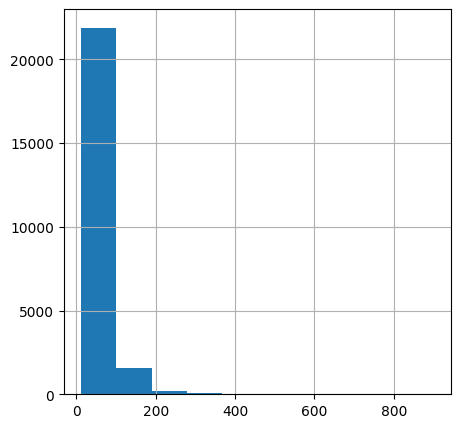

In [43]:
data['total_area'].hist(figsize = (5,5));

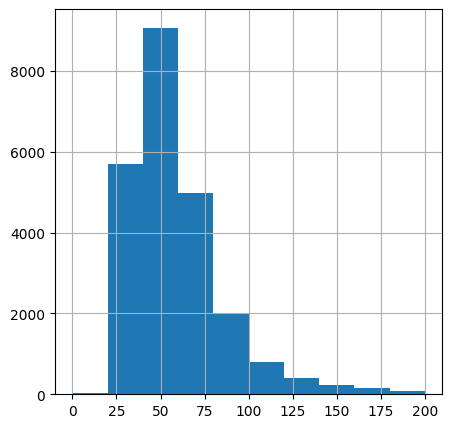

In [44]:
data['total_area'].hist(range = (0,200),figsize = (5,5));

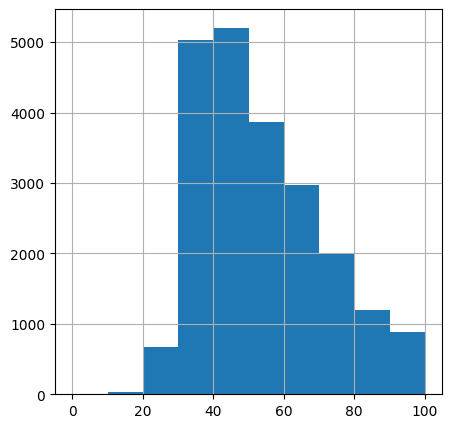

In [45]:
data['total_area'].hist(range = (0,100),figsize = (5,5));

С помощью range мы увидели пиковые значения, которые бы не увидели из-за "выбивающихся" данных. Гистограммы визуально подтверждают, что большая часть квартир в объявлениях имеет общую площадь ~30-45 кв.

2. Жилая площадь

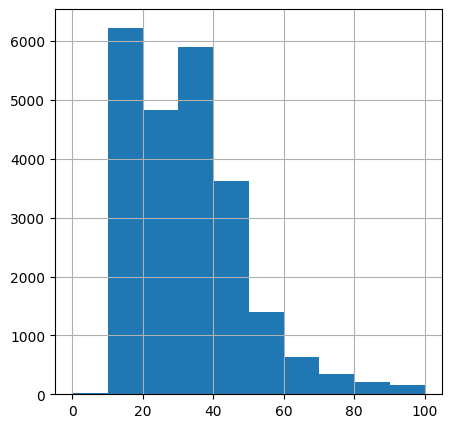

In [46]:
data['living_area'].hist(range = (0,100), figsize = (5,5));

3. Кухня

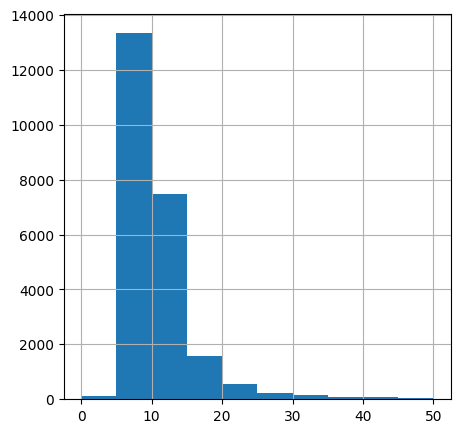

In [47]:
data['kitchen_area'].hist(range = (0,50),figsize = (5,5));

Вспомним среднюю цену

In [48]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

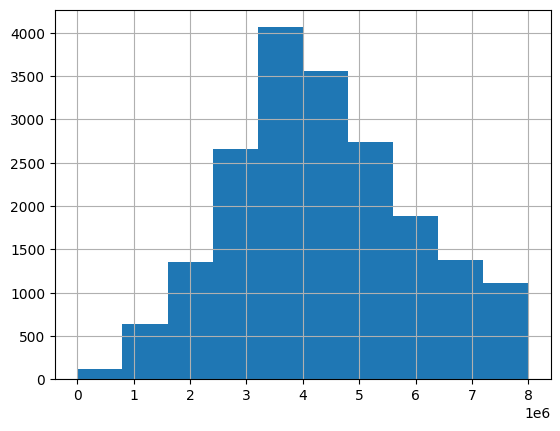

In [49]:
data['last_price'].hist(range= (0,8000000));

3. Комнаты

In [50]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В объявлениях чаще всего можно встретить квартиры с количеством комнат 1-2.

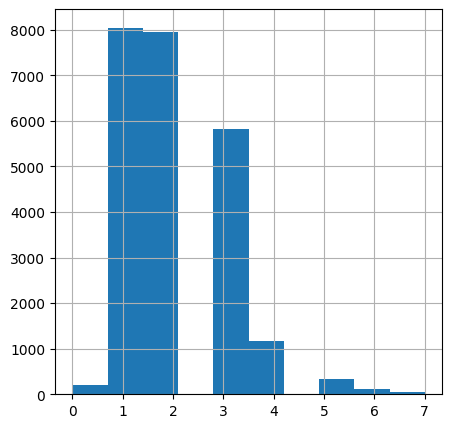

In [51]:
data['rooms'].hist(range = (0,7), figsize =(5,5));

4. Потолки

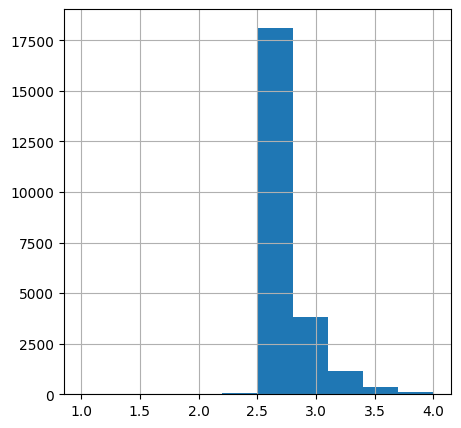

In [52]:
data['ceiling_height'].hist(range = (1,4),figsize = (5,5));

Мы помним, как боролись с аномалиями в потолках. Для нас выше 4 м - аномалия. Гистограмма показывает что высота в основном варьируется от 2,5 метров до 2,7, что соотвествует стандартам.

5. Этаж

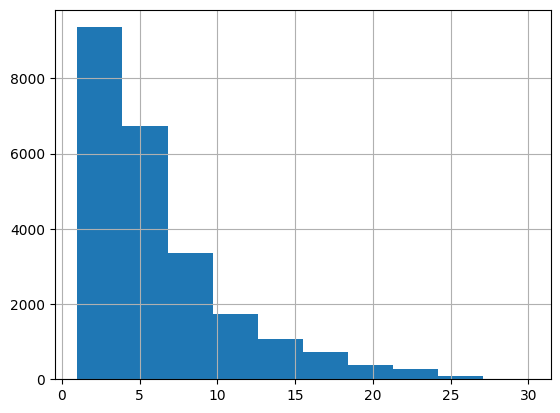

In [53]:
data['floor'].hist(range=(1,30));

Квартиры, расположенные ближе к 1 этажу, чаще всего выкладывают на продажу.

6. Тип этажа

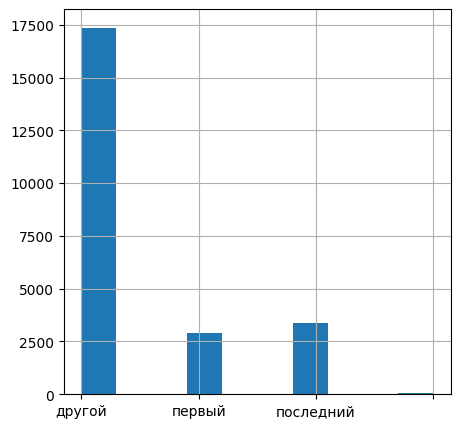

In [54]:
data['type_floor'].hist(figsize=(5,5));

В основном выставляют квартиры на продажу  на нижних этажах, но не на первом.

7. Тип этажа

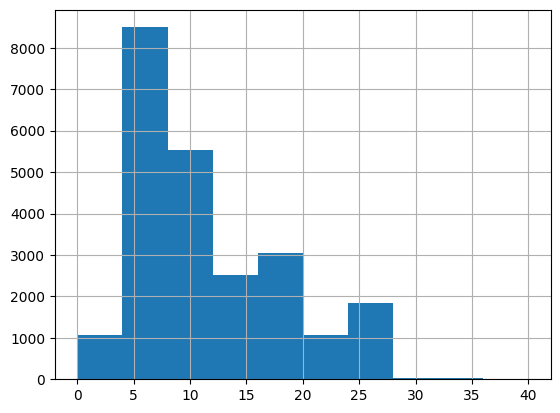

In [55]:
data['floors_total'].hist(range=(0,40));

8. Расстояние до центра города

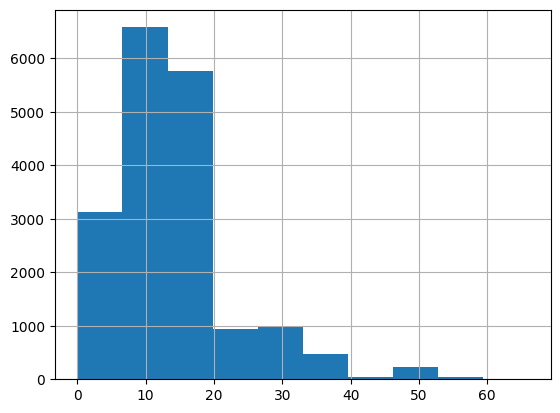

In [56]:
data['cityCenters_kilometers'].hist();

Больше всего на продажу выставляют квартиры с расположением либо рядом с чертой города, либо за ее пределами.

9. Расстояние до аэропорта

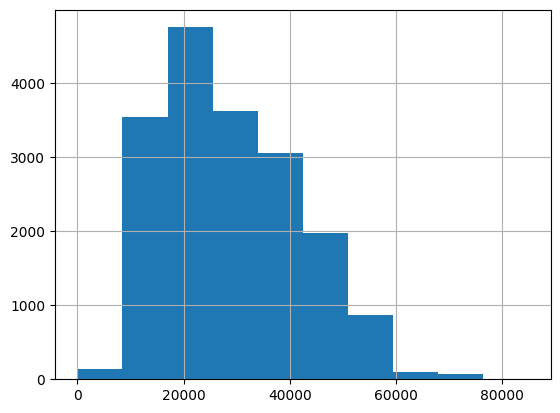

In [57]:
data['airports_nearest'].hist();

и от аэропорта далеко тоже квартиры чаще всего располагаются

10. Количество парков

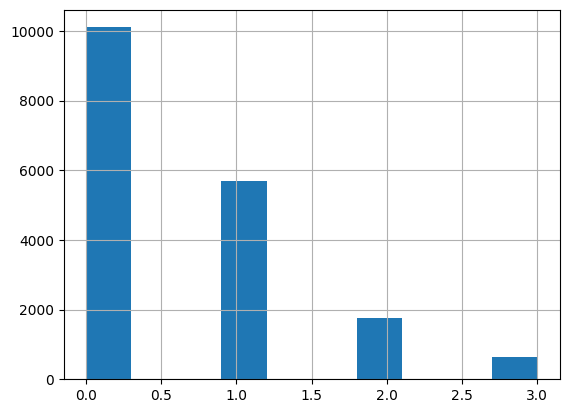

In [58]:
data['parks_around3000'].hist();

Количеству парков иногда не позавидуешь

11. День недели

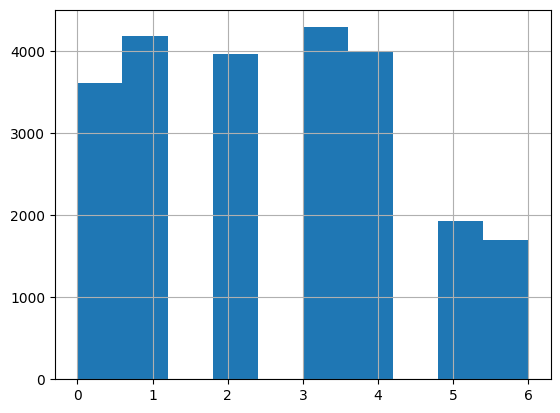

In [59]:
data['weekday'].hist();

По выходным люди ленятся выкладывать на продажу недвижимость:)

12. Месяц

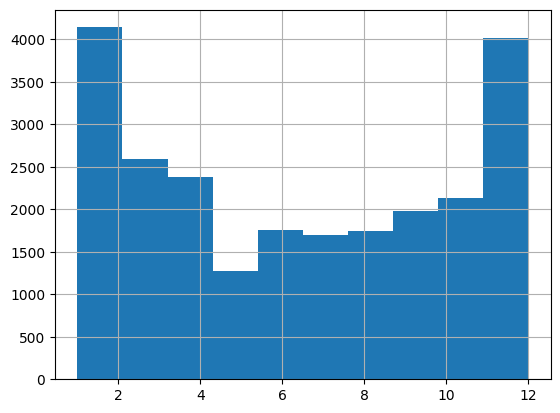

In [60]:
data['month'].hist();

# В мае не до продаж, все на огородах :)))

13. Год

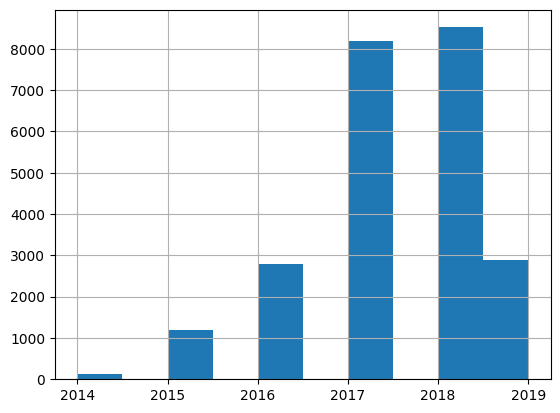

In [61]:
data['year'].hist();

2017 и 2018 года самые пиковые по размещению объявлений. Но к 2019 году объявлений стало меньше

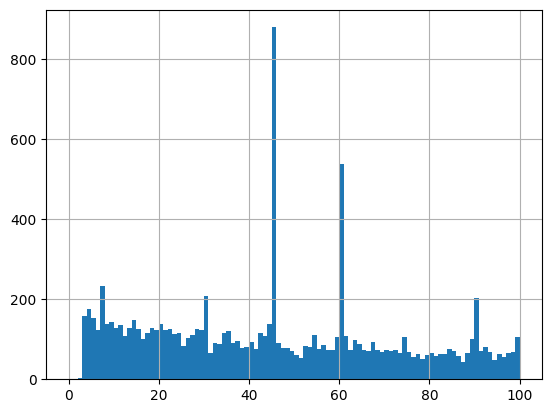

In [62]:
# изучаем, как быстро продавались квартиры
data['days_exposition'].hist(range=(0,100), bins=100);

Видим пики на значениях 45 и 60. Эти аномалии очень похожи на техническую особенность самой платформы: вероятнее в эти дни платформа автоматически убирает объявления, если пользователь его не продлил

In [63]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Обычно продажа квартир занимает 95 дней(чуть больше 3х месяцев). Самая долгая продажа составляла 1580 дней. Необычно долгими можно считать те объявления, которые лежат за 3 квартилем. Наверное, это зависит от цены и местоположения квартиры. Вряд ли кто-то быстро купить дорогую квартиру или где-нибудь за чертой города.

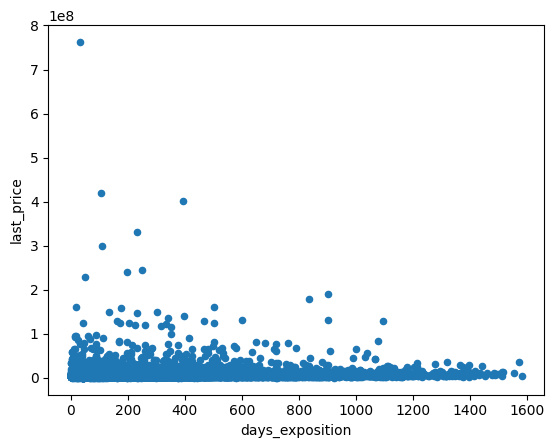

In [64]:
data.plot(x= 'days_exposition', y= 'last_price',  kind='scatter');

Для того, чтобы определить насколько тесна взаимосвязь двух показателей, найдем коэффициент Пирсона методом corr()

In [65]:
data['days_exposition'].corr(data['last_price'])

0.08114593098611309

Чем ближе коэф Пирсона к крайним значениям 1 и -1, тем теснее линейная зависимость.

Зависимости цены от продолжительности размещения объявления нет.

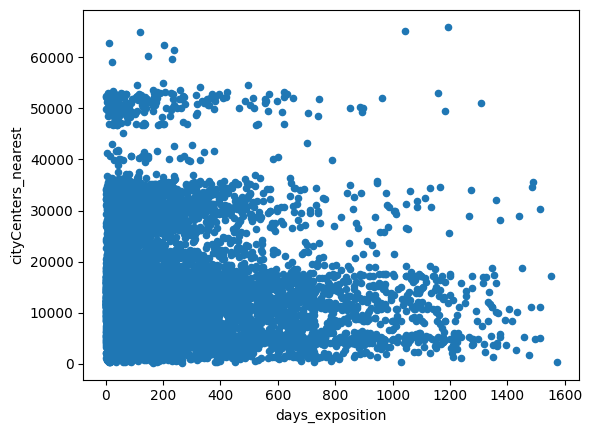

In [66]:
data.plot(x= 'days_exposition', y= 'cityCenters_nearest',  kind='scatter');

In [67]:
data['days_exposition'].corr(data['cityCenters_nearest'])

-0.06071397124248339

К гистограмме подкрепим корреляцию Пирсона. Зависимость продолжительности размещения объявления от расстояния не наблюдается.

Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров.

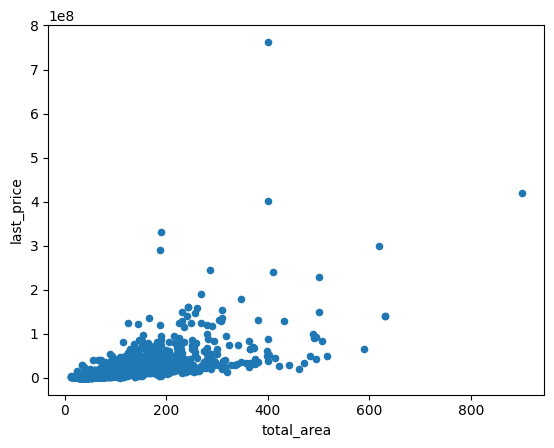

In [68]:
data.plot(x= 'total_area', y= 'last_price',  kind='scatter');

In [69]:
data['last_price'].corr(data['total_area'])

0.6536750579657239

Распределение Пирсона подтверждает, что зависимость цены от общей площади присутсвует.

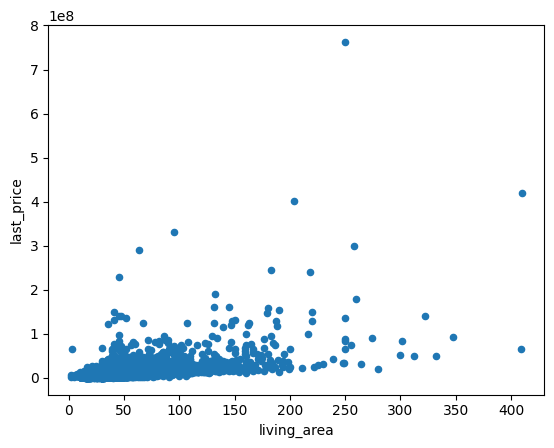

In [70]:
data.plot(x= 'living_area', y= 'last_price',  kind='scatter');

In [71]:
data['last_price'].corr(data['living_area'])

0.548878144963171

Цена зависит от жилой площади.

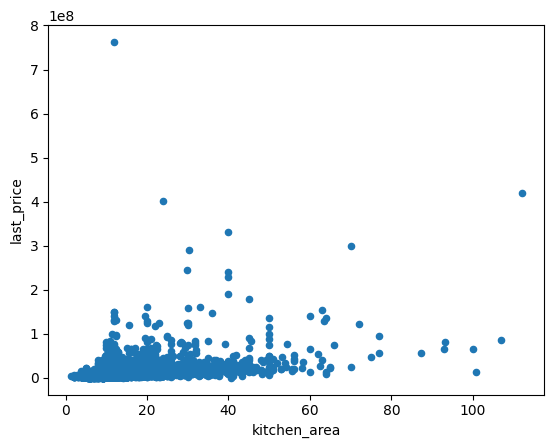

In [72]:
data.plot(x= 'kitchen_area', y= 'last_price',  kind='scatter');

In [73]:
data['last_price'].corr(data['kitchen_area'])

0.4472955534302576

Зависимость цены от площади кухни очень слабая. Все таки кухня - нежилое помещение. При покупке жилья в первую очередь обращают на площадь жилой части.

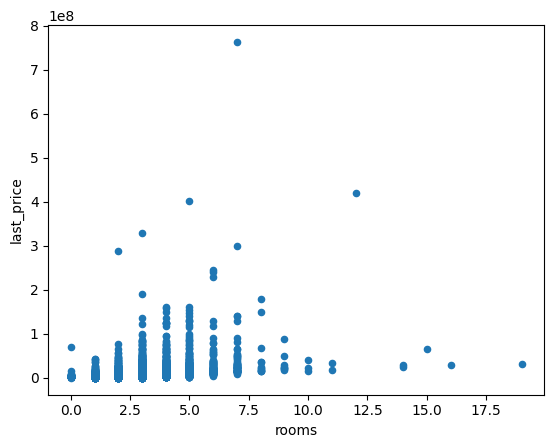

In [74]:
data.plot(x= 'rooms', y= 'last_price',  kind='scatter');

In [75]:
data['last_price'].corr(data['rooms'])

0.36334284996489574

Зависимости  цены от количества комнат уже почти нет. Это, видимо, как-то связано с тем, что кто-то продает часть квартиры(коммуналки).

зависимость цены от типа этажа

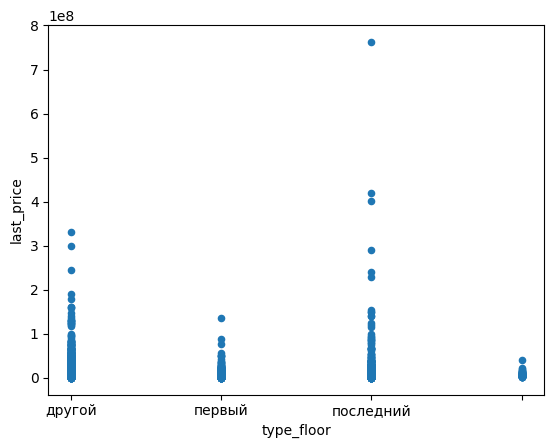

In [76]:
data.plot(x= 'type_floor', y= 'last_price',  kind='scatter');

Зависимости нет. Но иногда на последнем этаже дороже.

зависимость цены от дня недели, месяца и года размещения оъявления

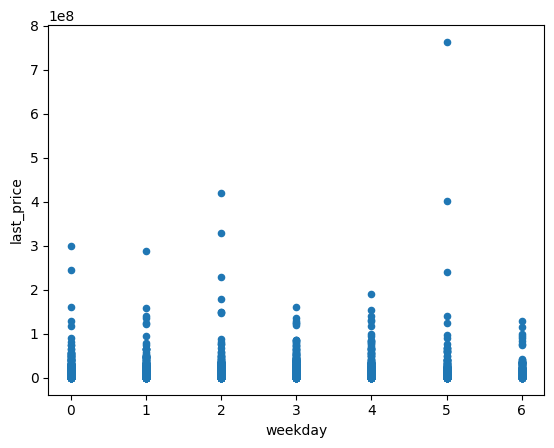

In [77]:
data.plot(x= 'weekday', y= 'last_price',  kind='scatter');

Зависимости нет.

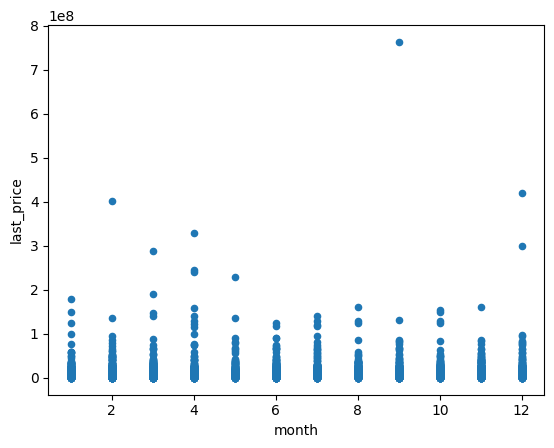

In [78]:
data.plot(x= 'month', y= 'last_price',  kind='scatter');

Четкая зависимость от месяца не наблюдается. Но перед летним периодом, бывает, повашают цены.

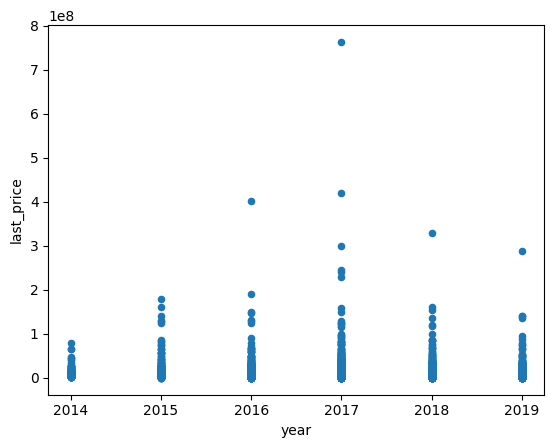

In [79]:
data.plot(x= 'year', y= 'last_price',  kind='scatter');

В 2017 году цены на квартиру подняли, а потом снова опустились

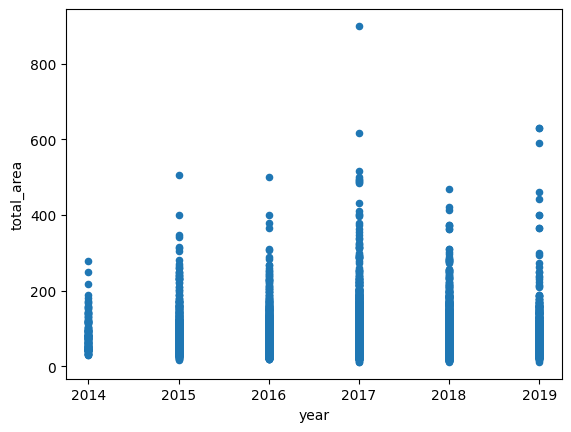

In [80]:
data.plot(x= 'year', y= 'total_area',  kind='scatter');

**В 2017 года наблюдаем пик не только в цене, но и в площади. А потом площадь сокращается и вместе с ней цена на квартиры.**

In [81]:
# средняя цену одного квадратного метра 
data_total_10 = data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

In [82]:
data_total_10.rename(columns = {'balcony':'count'})

,count,last_price
locality_name,,
Санкт-Петербург,15721,5500000.0
посёлок Мурино,556,3400000.0
Кудрово,472,3890000.0
посёлок Шушары,440,3950000.0
Всеволожск,398,3450000.0
Пушкин,369,5180000.0
Колпино,338,3600000.0
посёлок Парголово,327,4100000.0
Гатчина,307,3100000.0


Самая маленькая цена за 1 квадратный метр в Выборге. И самая большая в Санкт-Петербурге.
Интересно, что в Пушкине средняя цена почти не отличается от Питерской) 

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишим, как стоимость объектов зависит от расстояния до центра города.

In [83]:
data_spb_inter = data.loc[data['locality_name'] == 'Санкт-Петербург']

Тут лучше брать не среднее,а медиану. Так как на разном расстоянии может располагаться разное количество квартир.

In [84]:
data_spb = data_spb_inter.groupby('cityCenters_kilometers').agg({
    'balcony':'count',
    'last_price':'median'
}).sort_values(by='last_price',ascending = False).rename(columns = {'balcony':'count'})
data_spb

,count,last_price
cityCenters_kilometers,,
0.0,27,17900000.0
1.0,192,11395000.0
2.0,310,10000000.0
5.0,920,9500000.0
4.0,688,9200000.0
6.0,618,8900000.0
3.0,350,8409000.0
27.0,2,8300000.0
7.0,420,7800000.0


Без визуализиции не обойтись.

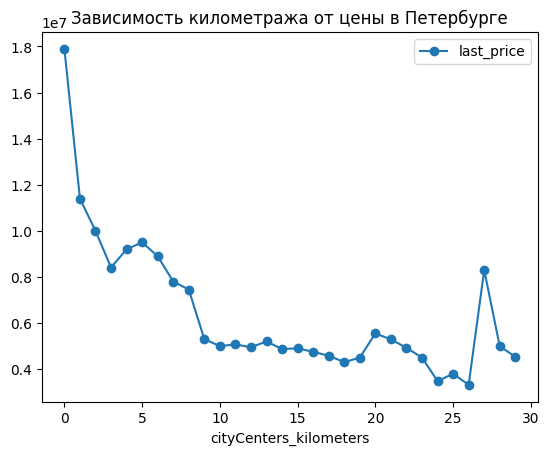

In [85]:
data_spb.pivot_table(index ='cityCenters_kilometers',
                     values = 'last_price', 
                     aggfunc='median' ).sort_values(by='cityCenters_kilometers', ascending = False).plot(style ='o-', title = 'Зависимость километража от цены в Петербурге' );

Наблюдается четкая зависимость цены от расположения.Самые дорогие квартиры находятся в центре города! Чем ближе к центру, тем дороже. Чем дальше от центра, тем ценовой разброс более интереснее.

А на каком расстоянии больше всего объявлениий о продажах в Санкт-Петербурге?

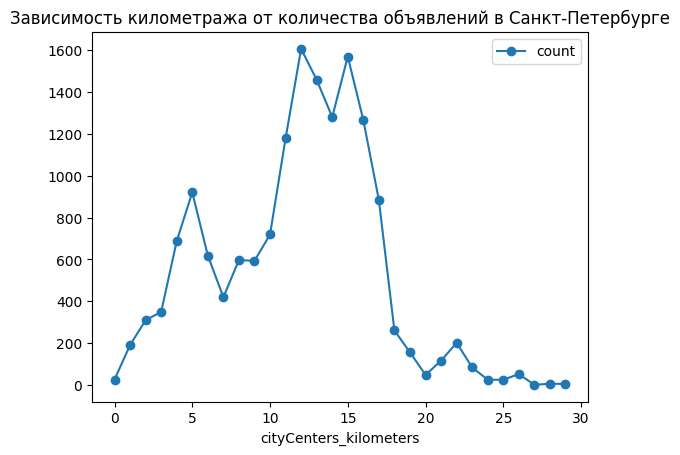

In [86]:
data_spb.pivot_table(index ='cityCenters_kilometers',
                     values = 'count', 
                     aggfunc='sum' ).sort_values(by='cityCenters_kilometers', ascending = False).plot(style ='o-' , title = 'Зависимость километража от количества объявлений в Санкт-Петербурге');

В центре не очень активно продают квартиры. А вот на расстоянии 5км и 13-16км очень много объявлений!

-----------

**Общий вывод:** 
1. Узнали от чего зависит цена на недвижимость:
* от расстояния
* от общей площади
* от жилой площади

Чем дальше ближе к центру, тем дороже. С увеличением площади цена тоже растет.

2. На продажу выставляют не только квартиры, но и их часть(отдельные комнаты).

3. Самыми популярным местами продажи недвижимости после Санкт-Петербурга идут Мурино, Кудрово и Шушары. Это очень похоже на правду, так как там много новостроек. Преимущество таких мест:
* рядом находится метро
* средняя цена радует  человеческий глаз

4. По средней цене на недвижимость Санкт-Петербург может посоревноваться с пригородом Пушкин.
5. В центре не очень активно продают недвижимость. Может, там выгоднее сдавать в аренду?:)
**То есть если Вы захотетие приобрести недвижимость в центре, будьте готовы к тому, что вариантов будет меньше и цена на них будет больше.**

Гораздо проще купить недвижимость ближе к черте города, там чаще выставляют на продажу квартиры + там дешевле. 
Также можно рассмотреть варианты с Мурино, Кудрово, Шушарами: если Вас немного смущает расстояние, то цена Вас приятно удивит.